In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE, MDS
from scipy.spatial.distance import squareform
from sklearn.metrics import euclidean_distances
pd.set_option('max_columns', None)
matplotlib.rcParams['figure.figsize'] = (8,5)

# Some EDA

In [6]:
wine = pd.read_csv('wines.csv')
wine.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alkalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavonoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Stilbenes,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


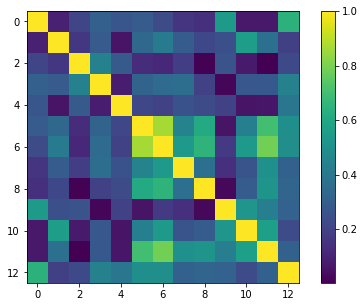

In [7]:
plt.imshow(abs(wine.corr()))
plt.colorbar()

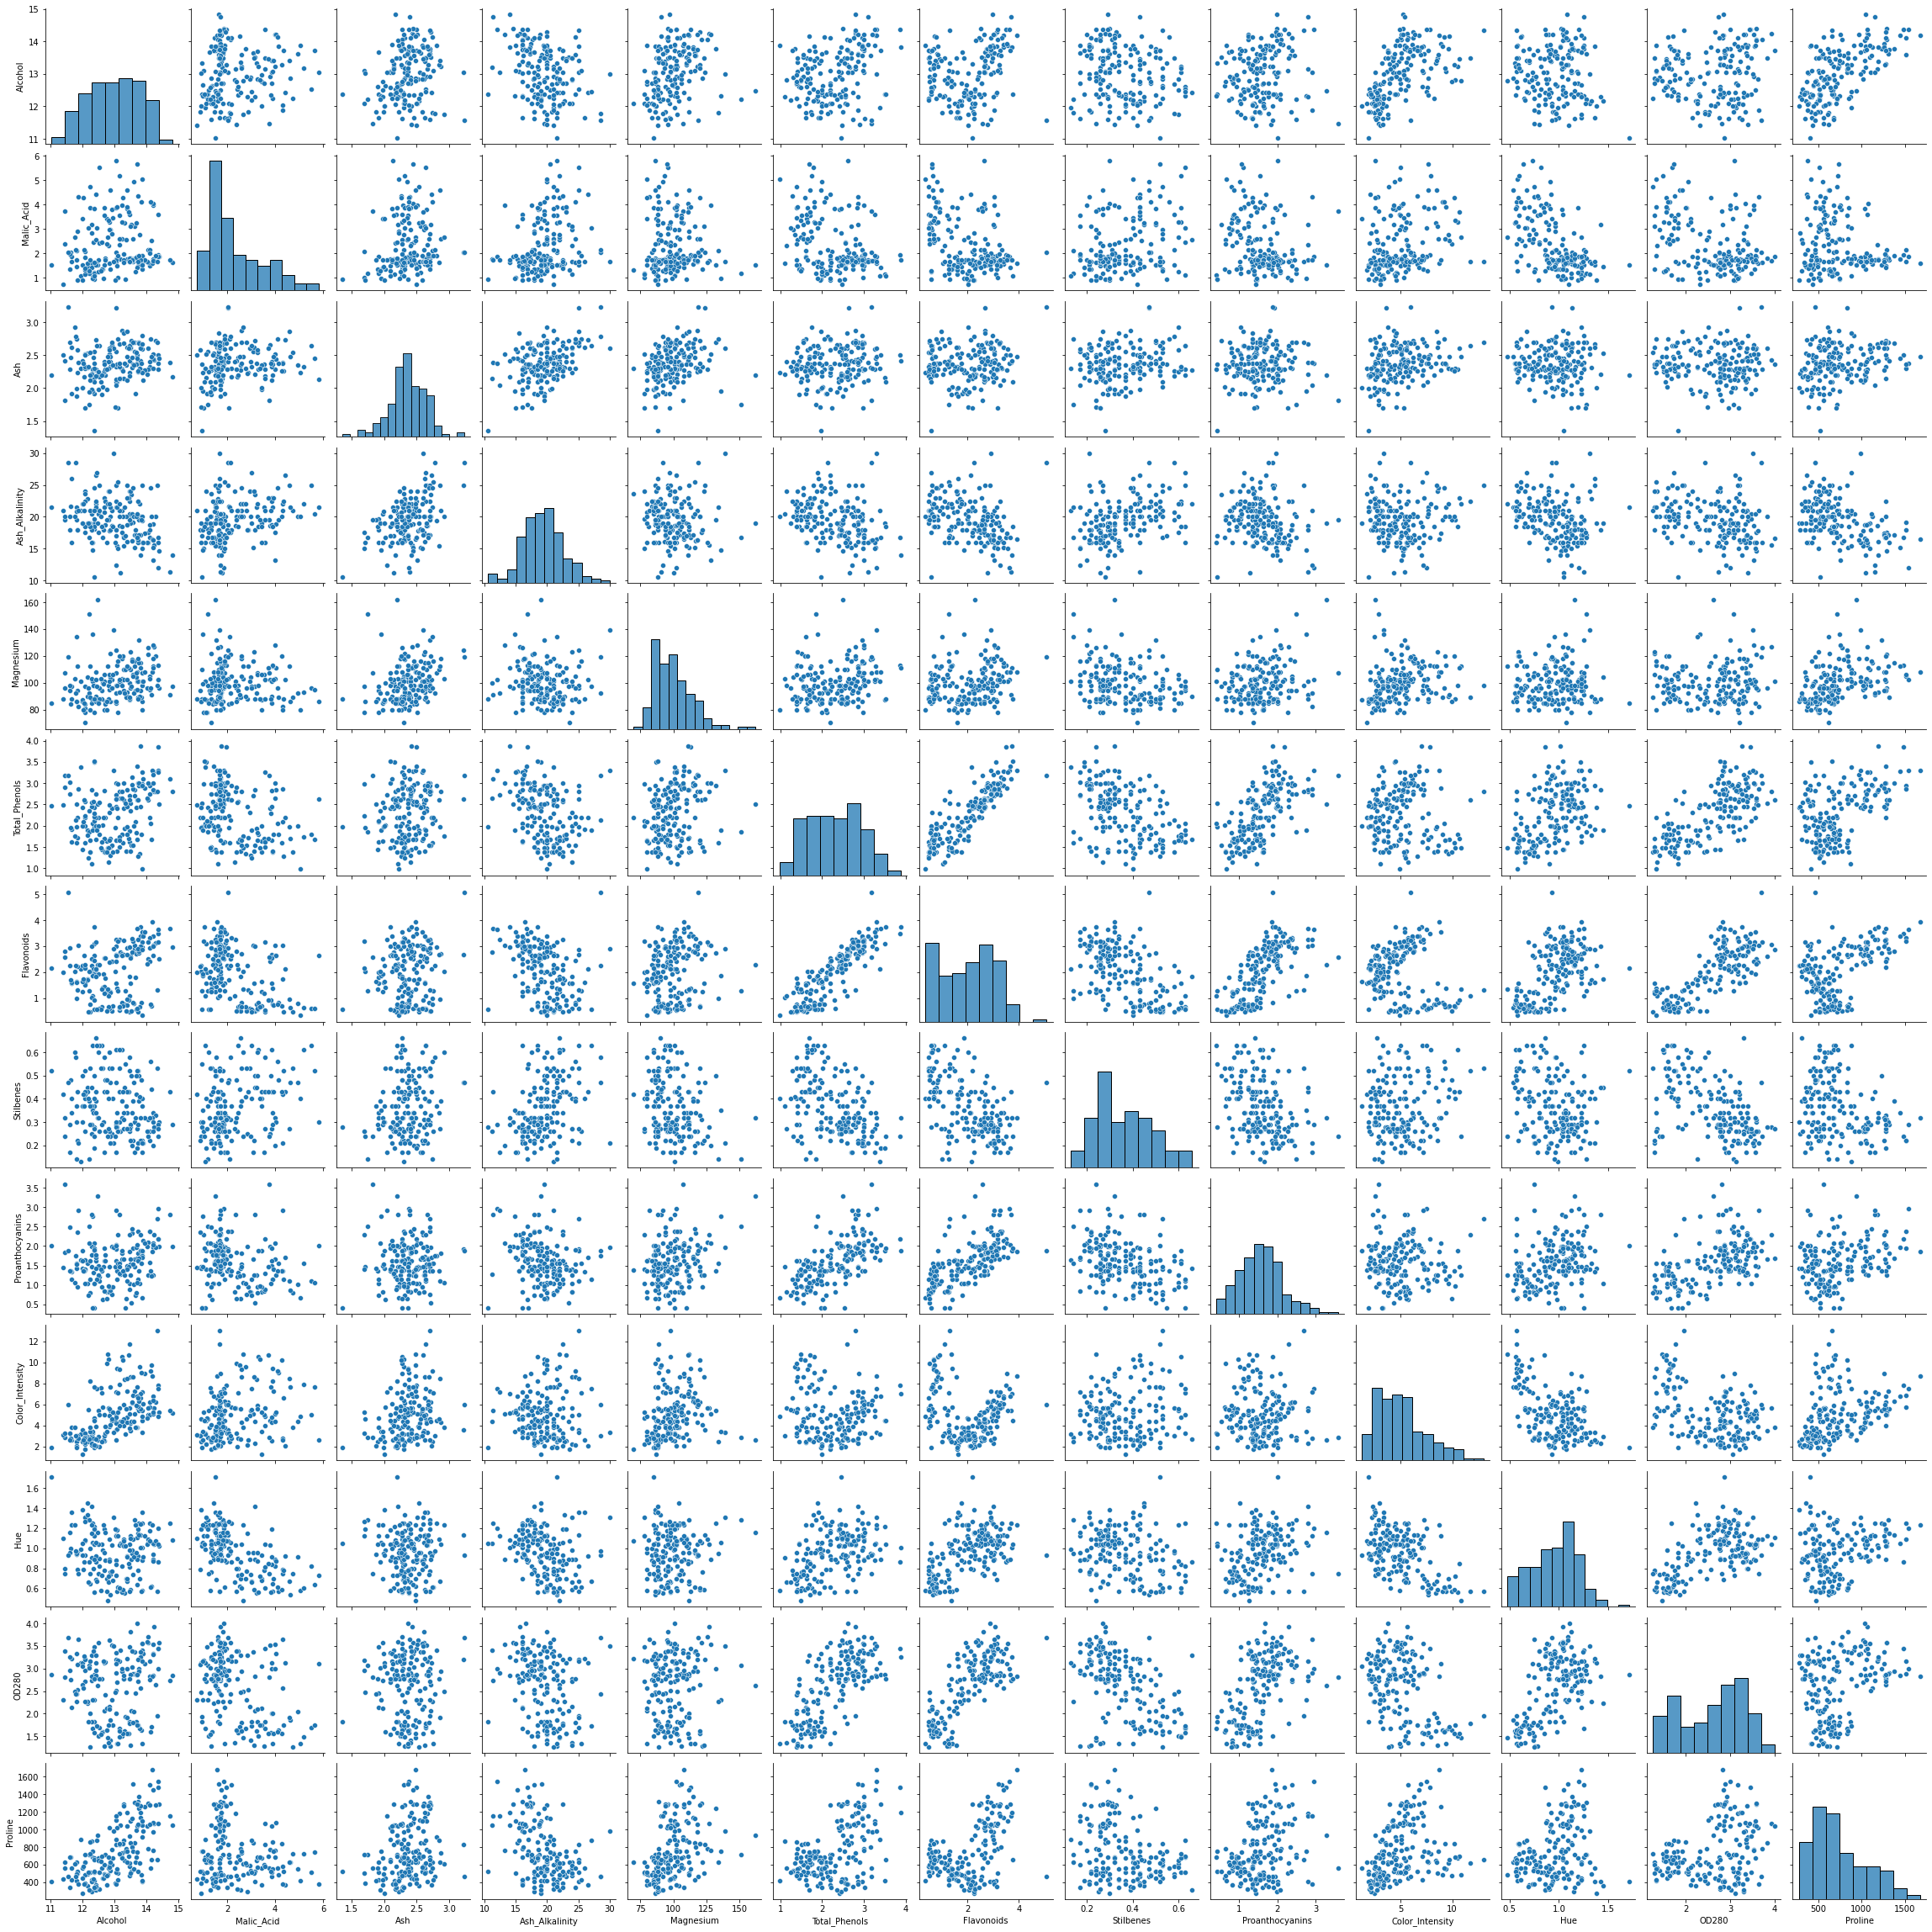

In [8]:
sns.pairplot(wine)

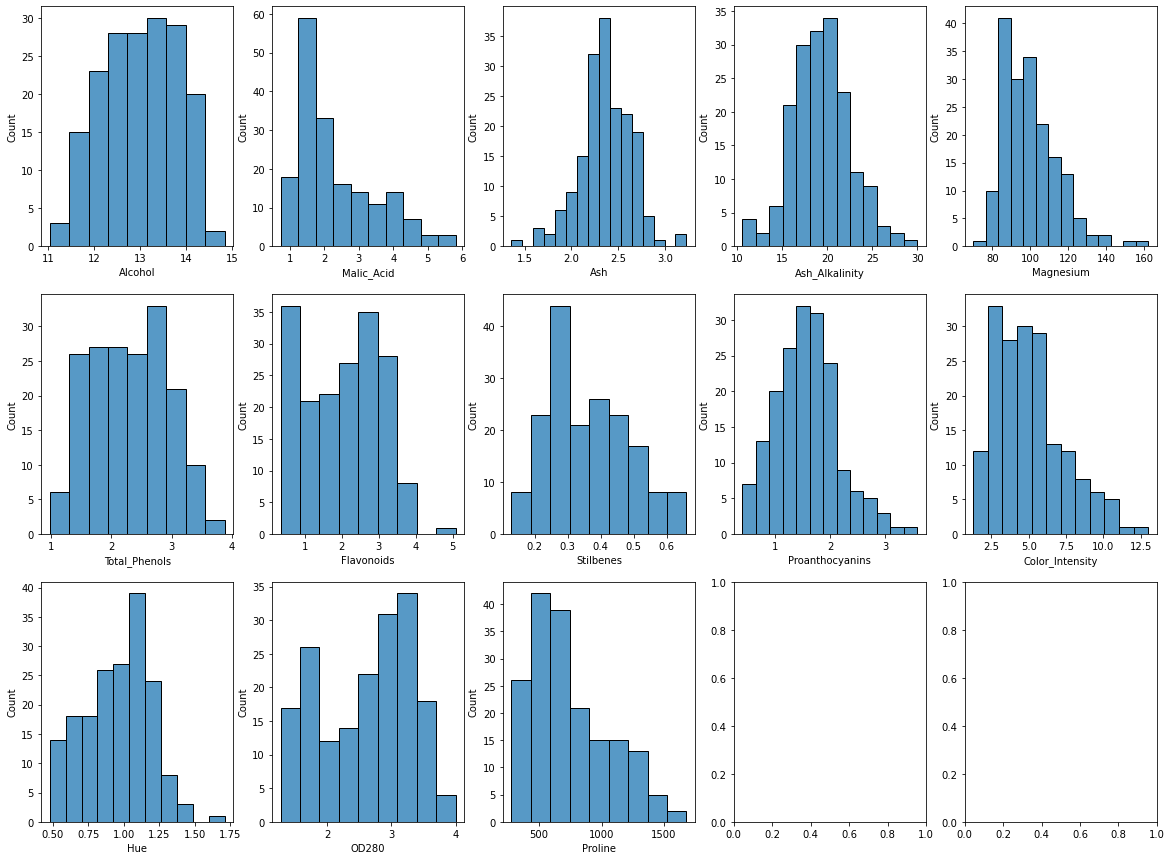

In [27]:
#plt.figure(figsize = (8,10))
fig, ax = plt.subplots(3,5,figsize = (20,15))
z= 0
for ii in range(3):
    for jj in range(5):
        try:
            sns.histplot(ax = ax[ii, jj], data = wine[wine.columns[z]])#.set(title = wine.columns[z])
        except:
            break
        z += 1
        
        
#sns.distplot(wine.iloc[:, 0], bins = 30)

# 1. Do a PCA on the data. How many Eigenvalues are above 1? Plotting the 2D solution (projecting the data on the first 2 principal components), how much of the variance is explained by these two dimensions, and how would you interpret them?

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
wineStandardized = StandardScaler().fit_transform(wine)
pca = PCA().fit(wineStandardized)
eigenValues = pca.explained_variance_
explainedVar = pca.explained_variance_ratio_
temp = np.linspace(0, len(wineStandardized[0])-1,len(wineStandardized[0]))


Text(0, 0.5, 'Explained Variance')

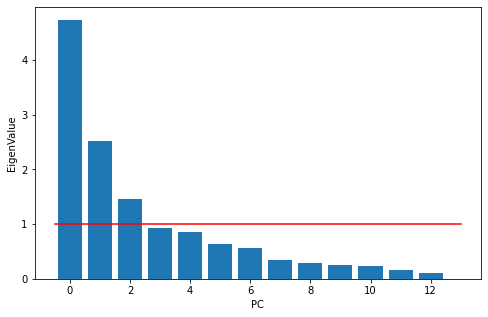

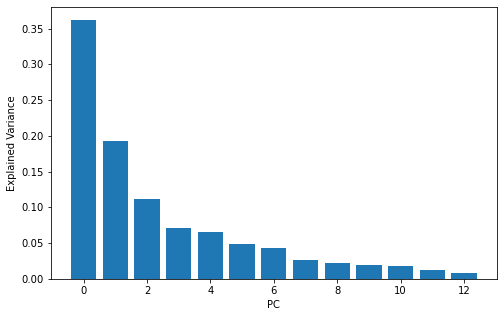

In [49]:
plt.plot([-0.5,13], [1, 1], color = 'red')
plt.bar(temp, eigenValues)
plt.xlabel('PC')
plt.ylabel('EigenValue')
# 3 eigen above 1
plt.figure()
plt.bar(temp, explainedVar)
plt.xlabel('PC')
plt.ylabel('Explained Variance')

Flavonoids         0.422934
Total_Phenols      0.394661
OD280              0.376167
Proanthocyanins    0.313429
Stilbenes          0.298533
Hue                0.296715
Proline            0.286752
Malic_Acid         0.245188
Ash_Alkalinity     0.239320
Alcohol            0.144329
Magnesium          0.141992
Color_Intensity    0.088617
Ash                0.002051
dtype: float64

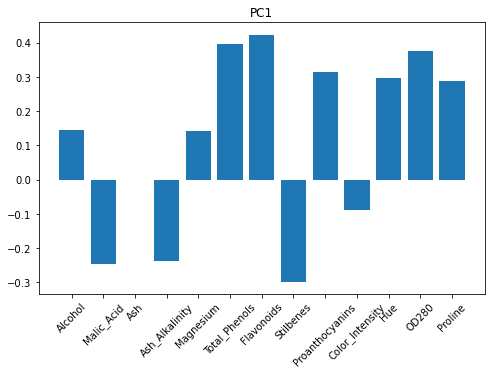

In [58]:
# get 2 PCs
pca = PCA(2).fit(wineStandardized)
winePCA = pca.fit_transform(wineStandardized)
loadings = pca.components_
plt.bar(range(len(loadings[0])), loadings[0])
plt.xticks(range(len(loadings[0])), wine.columns, rotation = 45);
plt.title('PC1')
pd.Series(abs(loadings[0]), index = wine.columns).sort_values(ascending=False)

Color_Intensity    0.529996
Alcohol            0.483652
Proline            0.364903
Ash                0.316069
Magnesium          0.299634
Hue                0.279235
Malic_Acid         0.224931
OD280              0.164496
Total_Phenols      0.065040
Proanthocyanins    0.039302
Stilbenes          0.028779
Ash_Alkalinity     0.010591
Flavonoids         0.003360
dtype: float64

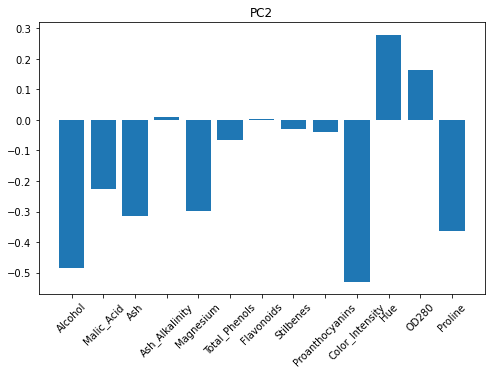

In [60]:
plt.bar(range(len(loadings[0])), loadings[1])
plt.xticks(range(len(loadings[0])), wine.columns, rotation = 45);
plt.title('PC2')
# alcohol and color
pd.Series(abs(loadings[1]), index = wine.columns).sort_values(ascending=False)

1) Alcohol content (in %)
2) Malic acid concentration (in g/L)
3) Ash content (in mg/L) [This is not as gross as it sounds, mostly minerals absorbed by the
grapes through the soil]
4) Alkalinity of the Ash (g/L of potassium carbonate)
5) Magnesium (mg / L)
6) Total phenols (mg / L per epa method)
7) Flavonoids (mg / L)
8) Stilbenes (mg / L)
9) Proanthocyanins (mg / L)
10) Color intensity (reflecting opacity)
11) Hue (= color)
12) OD280 (Protein concentration)
13) Proline content (amino acid)"

In [176]:
# Explained variance by 2 PCs
print(sum(pca.explained_variance_ratio_[:2]))
#55.406%
pca.explained_variance_ratio_.cumsum()

0.5540633835693529


array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Text(0, 0.5, 'Strength')

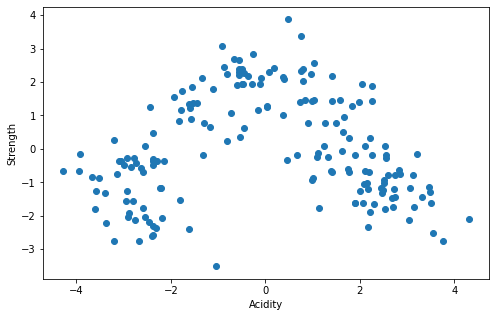

In [61]:
plt.scatter(winePCA[:,0], winePCA[:, 1])
plt.xlabel("PC1 (Acidity)")
plt.ylabel("PC2 (Strength)")

# Use t-SNE on the data. How does KL-divergence depend on Perplexity (vary Perplexity from 5 to 150)? Make sure to plot this relationship. Also, show a plot of the 2D component with a Perplexity of 20.

In [62]:
# find relationship btw KL and Perplexity
temp = np.linspace(5, 150,30)
kl = np.empty(len(temp))*np.nan
for ii, p in enumerate(temp):
    tsne = TSNE(perplexity=p, n_jobs=-1).fit(wineStandardized)
    kl[ii] = tsne.kl_divergence_


Text(0, 0.5, 'KL-Divergence')

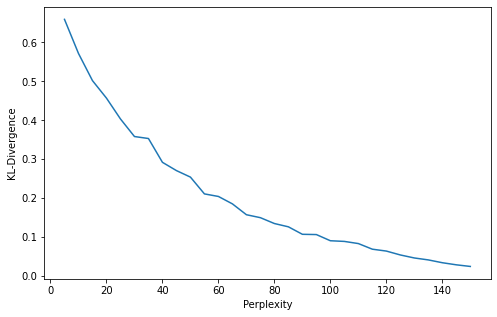

In [65]:
plt.plot(temp, kl)
plt.xlabel("Perplexity")
plt.ylabel("KL-Divergence")


Text(0.5, 1.0, 'perplexity= 20, KL-Divergence= 0.48705')

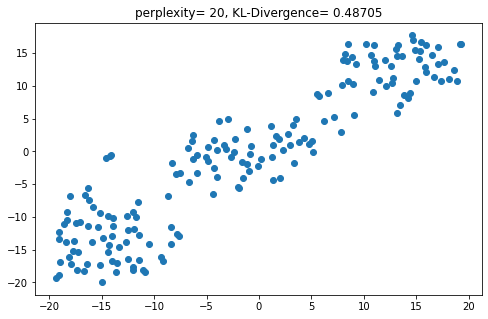

In [93]:
tsne = TSNE(perplexity=20, n_jobs = -1).fit(wineStandardized)
wineTsne = tsne.fit_transform(wineStandardized)
plt.scatter(wineTsne[:, 0], wineTsne[:, 1])
plt.title("perplexity= 20, KL-Divergence= %0.5f" % tsne.kl_divergence_)


# 3. Use MDS on the data. Try a 2-dimensional embedding. What is the resulting stress of this embedding? Also, plot this solution and comment on how it compares to t-SNE.


In [81]:
d = euclidean_distances(wineStandardized)
d ** 2

array([[ 0.        , 12.23275263,  9.16035564, ..., 42.1323189 ,
        36.95157735, 51.61590615],
       [12.23275263,  0.        , 17.16371897, ..., 40.92032559,
        37.14813687, 54.28328646],
       [ 9.16035564, 17.16371897,  0.        , ..., 39.10847893,
        34.24348489, 40.37185496],
       ...,
       [42.1323189 , 40.92032559, 39.10847893, ...,  0.        ,
         3.33507163, 11.50915976],
       [36.95157735, 37.14813687, 34.24348489, ...,  3.33507163,
         0.        , 11.05081311],
       [51.61590615, 54.28328646, 40.37185496, ..., 11.50915976,
        11.05081311,  0.        ]])

In [200]:
mds = MDS(n_components=2, n_jobs=-1, dissimilarity="precomputed").fit(d) #Create the mds object
wineMDS = mds.fit_transform(d)
points = mds.embedding_
stress = mds.stress_
#compute stress
stress1 = np.sqrt(stress / (0.5*np.sum(d ** 2)))
stress1

0.23081528095095966

Text(0.5, 1.0, 'MDS, Unnormalized Stress= 21943.832120, Normalized Stress: 0.230815')

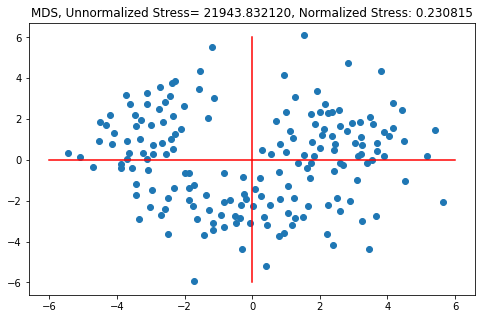

In [201]:
plt.scatter(wineMDS[:, 0], wineMDS[:, 1])
plt.plot([-6,6], [0,0], color = 'red')
plt.plot([0,0], [6,-6], color = 'red')
plt.title("MDS, Unnormalized Stress= %f, Normalized Stress: %f" % (stress, stress1))
#mds.fit(wineStandardized).stress_

In [13]:
print(mds.stress_)

21906.372745074565


# Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use the Silhouette method to determine the optimal number of clusters and then use kMeans with that number (k) to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. What is the total sum of the distance of all points to their respective clusters centers, of this solution?

In [158]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5]
X = wineTsne.copy()
def silhoutte(X, range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots()
        fig.set_size_inches(10, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        '''colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=50, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )'''

    plt.show()

In [102]:
# 3 Clusters
kMeans = KMeans(n_clusters=3).fit(X)
k = kMeans.predict(X)

In [103]:
kMeans.cluster_centers_

array([[ -1.2618346 ,  -0.21030343],
       [ 12.872054  ,  12.538128  ],
       [-14.443014  , -12.892462  ]], dtype=float32)

/var/folders/bt/709h7c513ld30l7ynqg_cv0c0000gn/T/ipykernel_1286/183516154.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], 'o', color = 'black', marker = '*', markersize = 20)


Text(0.5, 1.0, 'KMeans, Inertia = 4632.149902')

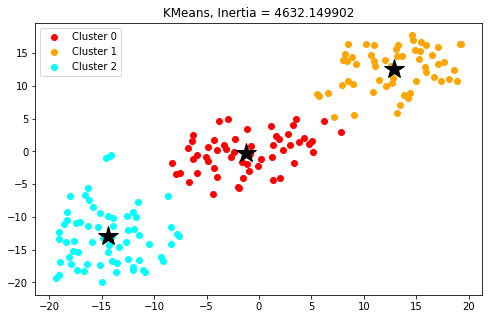

In [116]:
plt.plot(X[np.argwhere(k == 0), 0], X[np.argwhere(k == 0), 1], 'o', color = 'red')
plt.plot(X[np.argwhere(k == 1), 0], X[np.argwhere(k == 1), 1], 'o', color = 'orange')
plt.plot(X[np.argwhere(k == 2), 0], X[np.argwhere(k == 2), 1], 'o', color = 'cyan')
plt.plot(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], 'o', color = 'black', marker = '*', markersize = 20)
plt.legend(['Cluster 0','Cluster 1','Cluster 2'])
plt.title("KMeans, Inertia = %f" % kMeans.inertia_)

array([-1.2618346 , -0.21030343], dtype=float32)

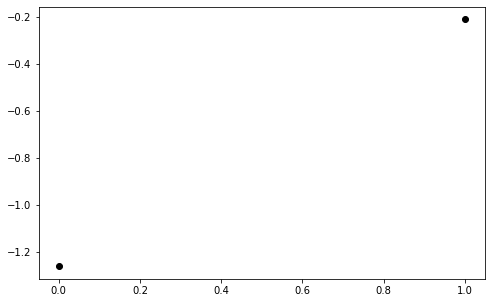

In [110]:
kMeans.inertia_
plt.plot(kMeans.cluster_centers_[0], 'o', color = 'black')
kMeans.cluster_centers_[0]

# 5. Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use dBScan to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. Make sure to suitably pick the radius of the perimeter (“epsilon”) and the minimal number of points within the perimeter to form a cluster (“minPoints”) and comment on your choice of these two hyperparameters.

In [204]:
db = DBSCAN(eps = 0.7, min_samples = 2)
dbLabes = db.fit_predict(winePCA)

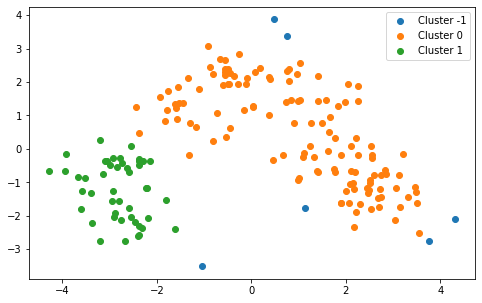

In [205]:
for ii in np.unique(dbLabes):
    plt.plot(winePCA[np.argwhere(dbLabes == ii), 0], winePCA[np.argwhere(dbLabes == ii), 1], 'o')

plt.legend(['Cluster %d' % ii for ii in np.unique(dbLabes)])

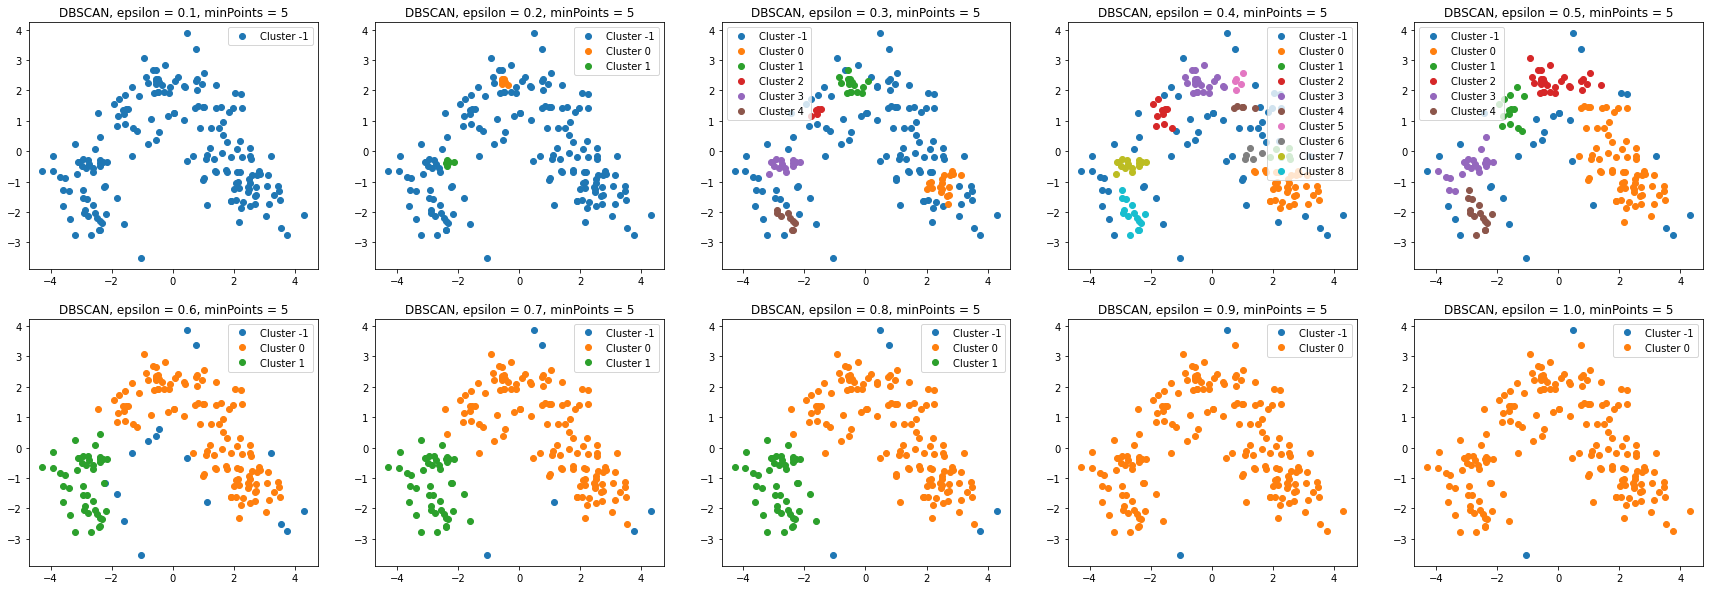

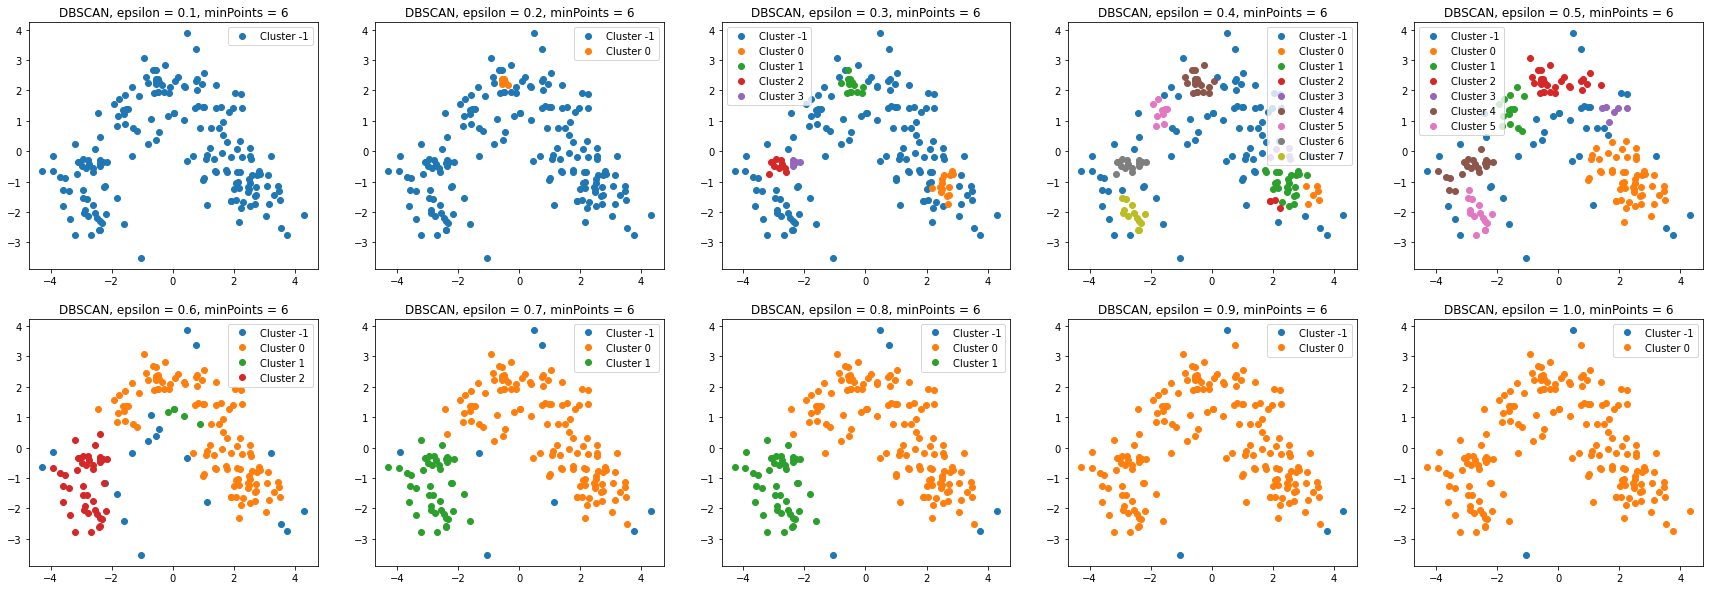

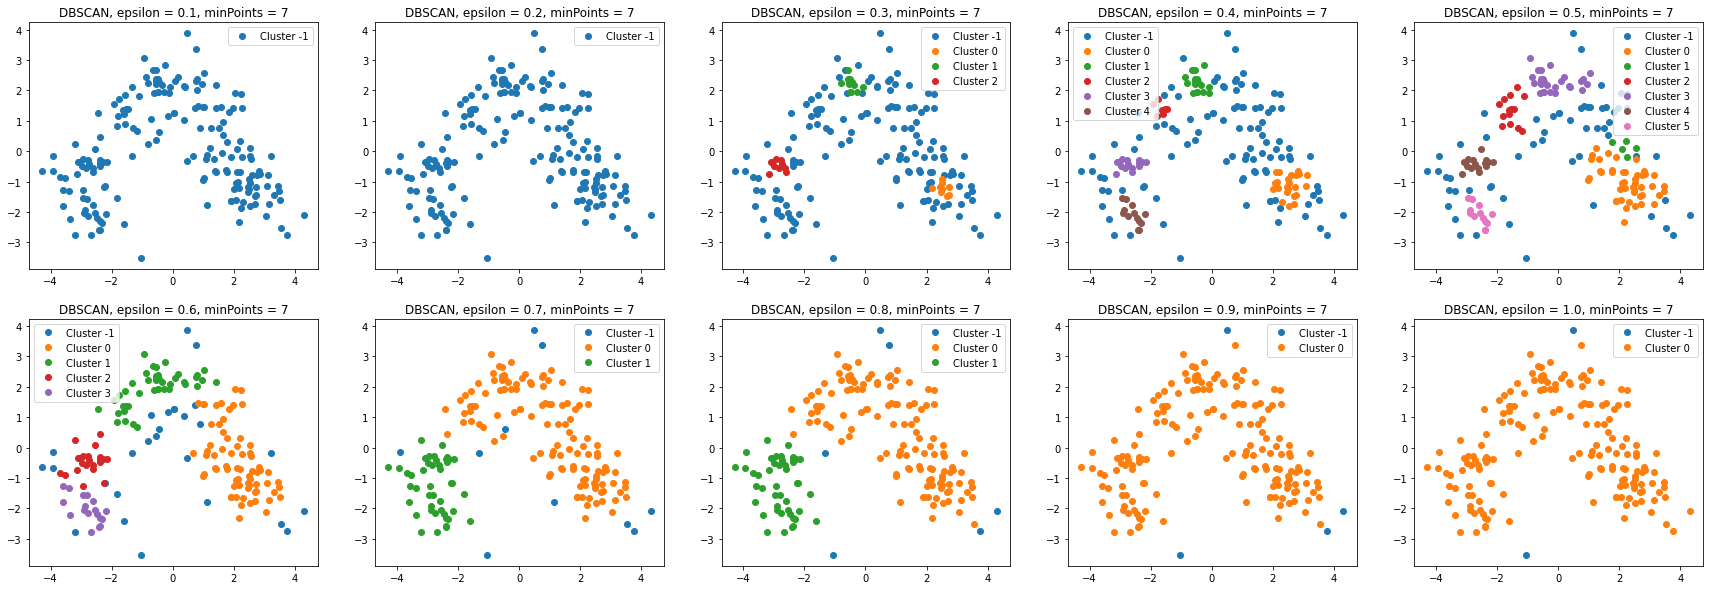

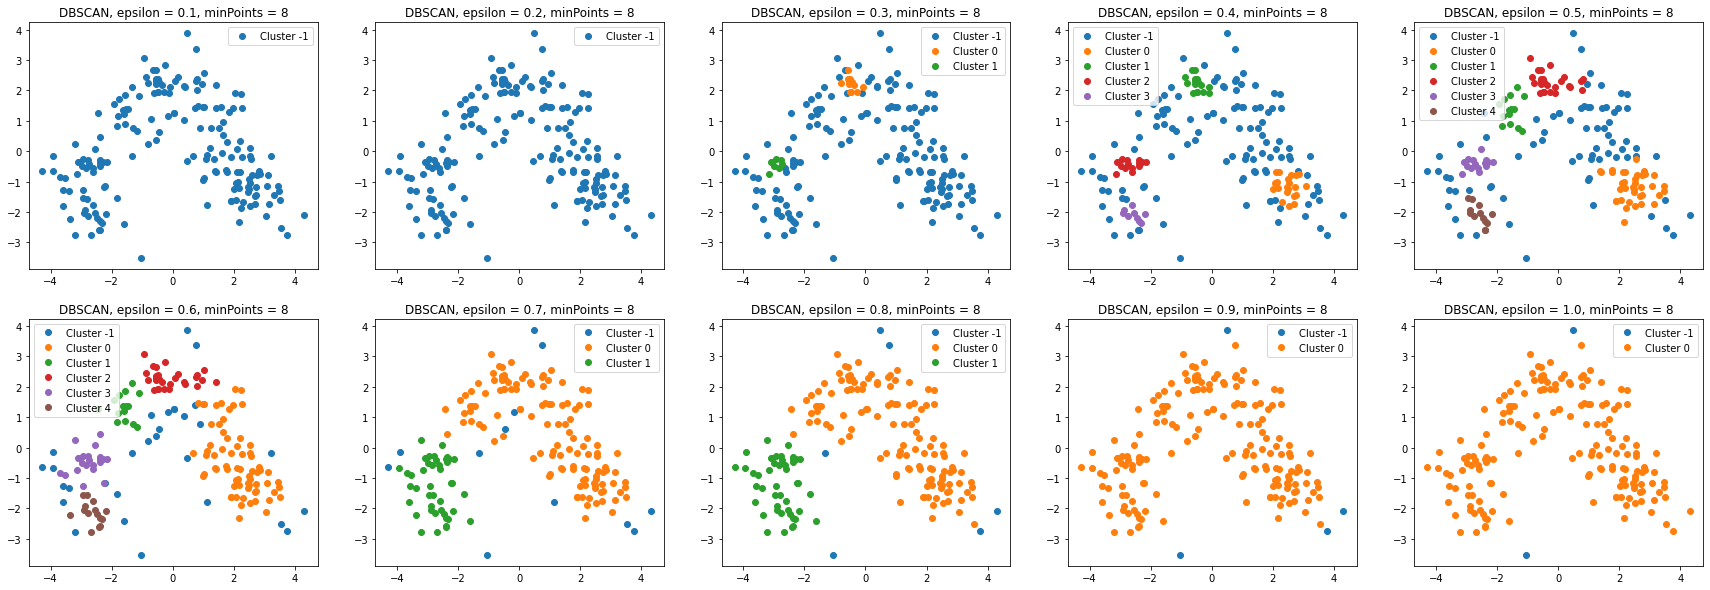

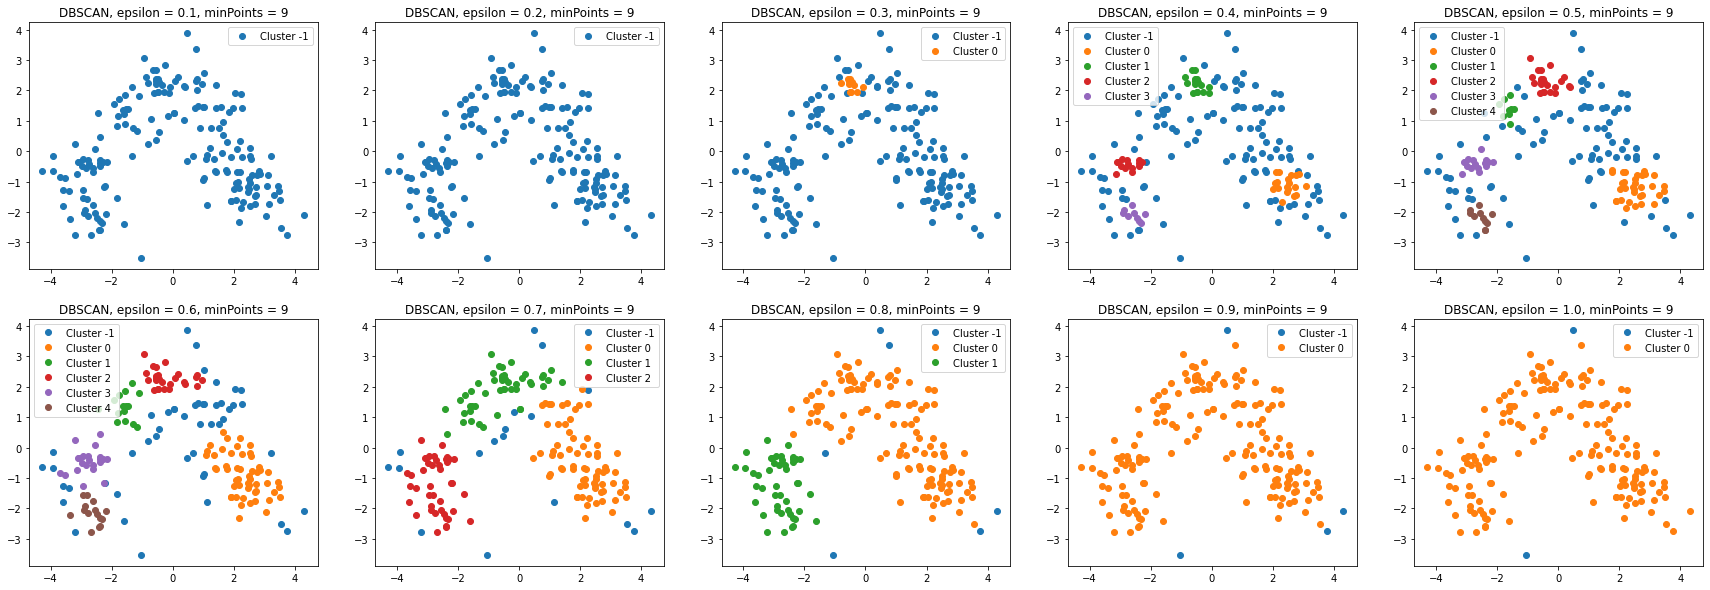

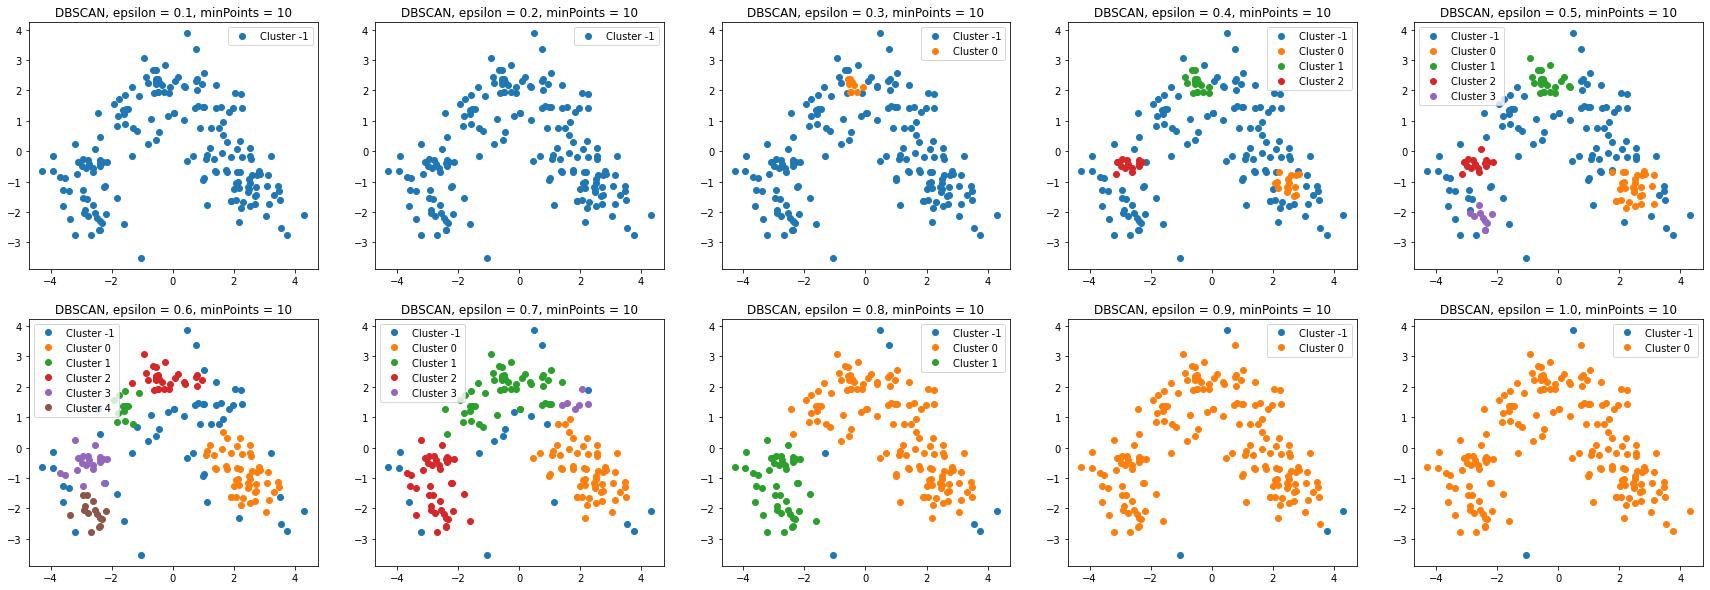

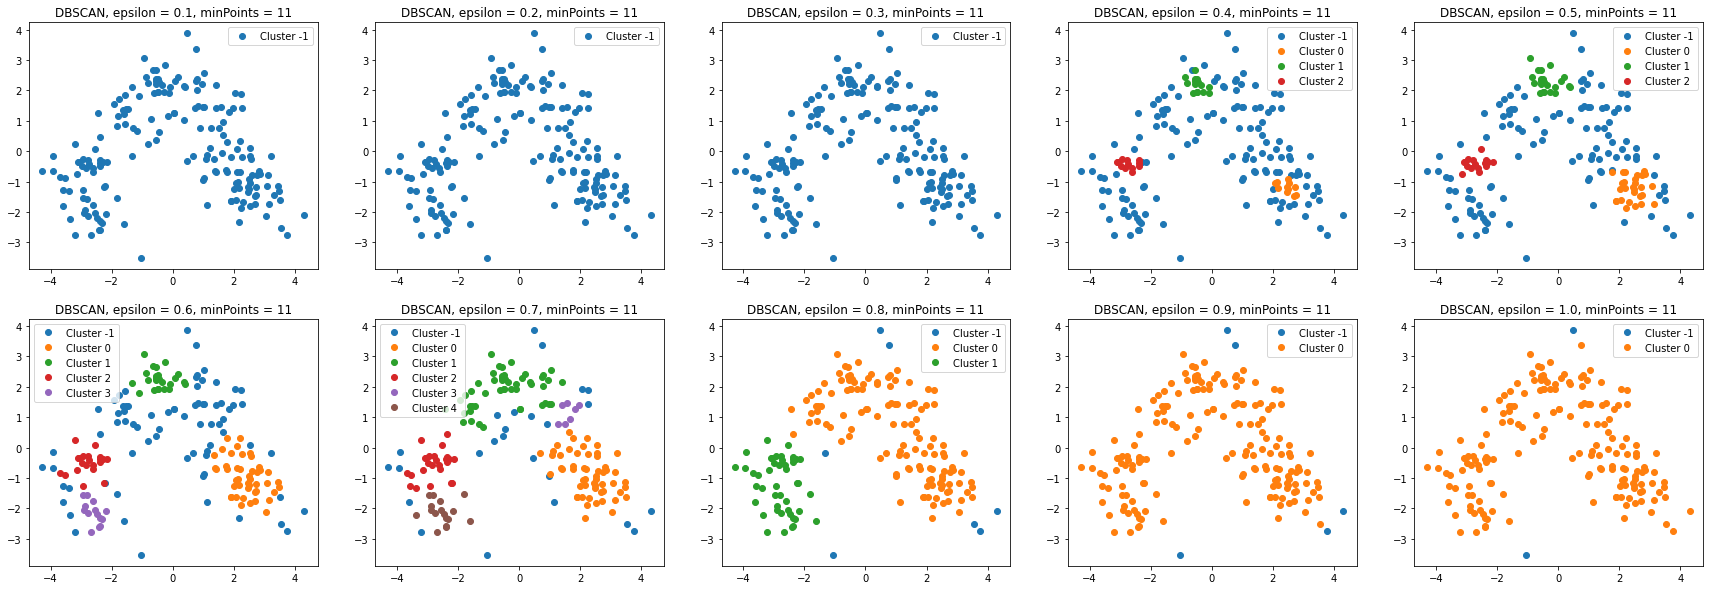

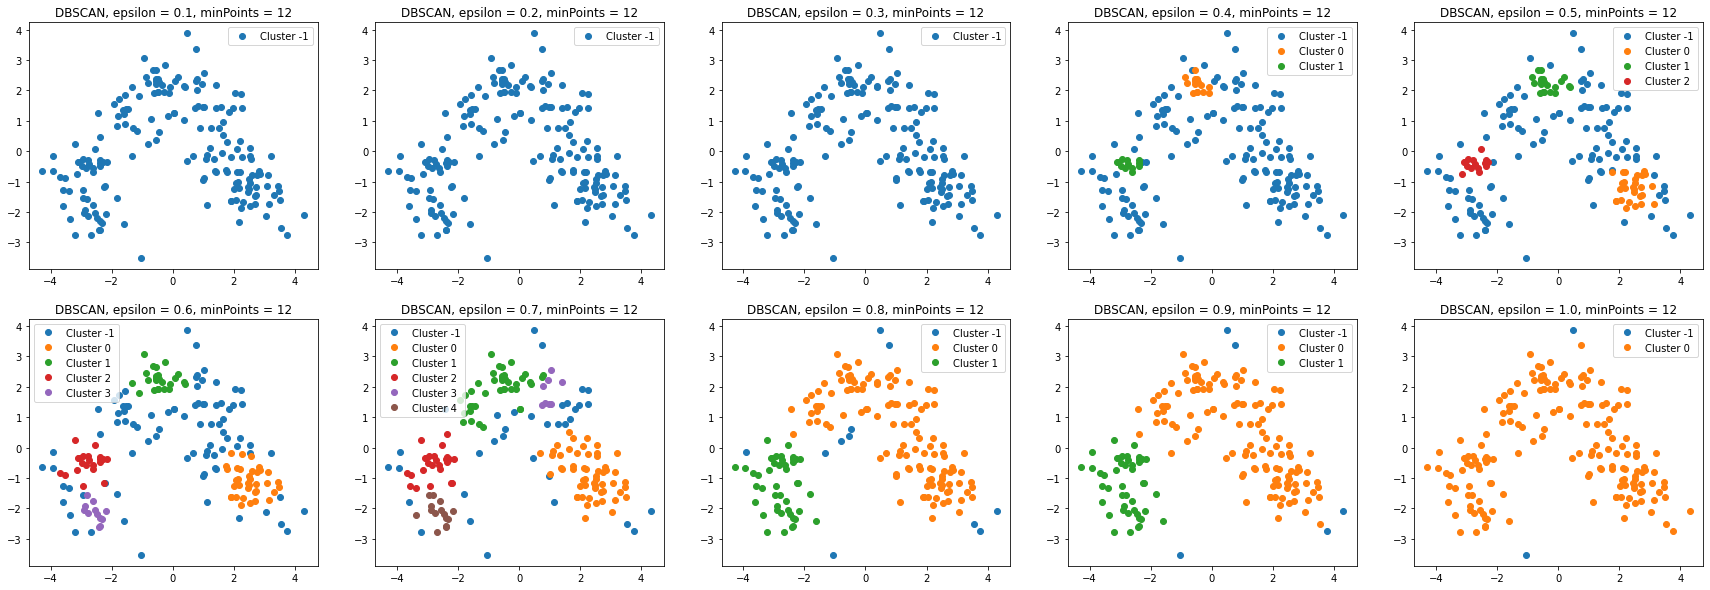

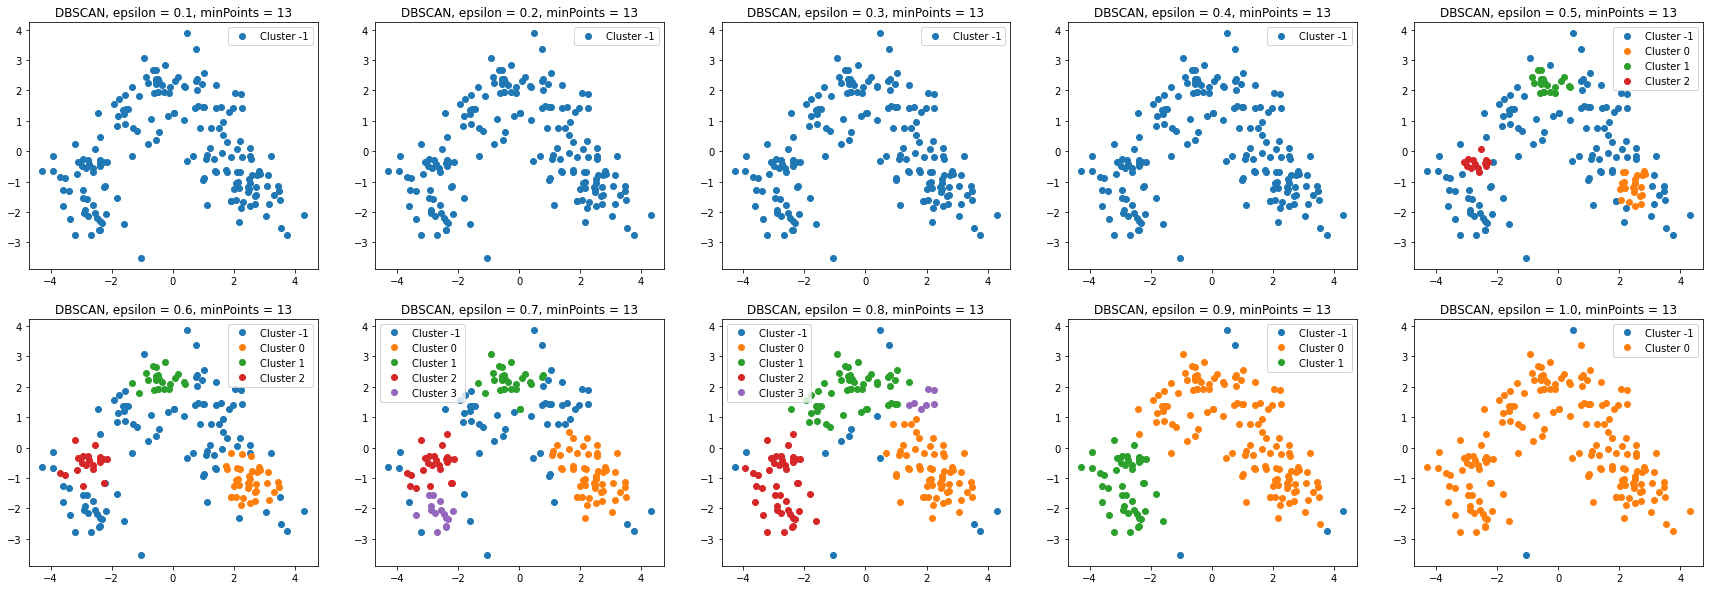

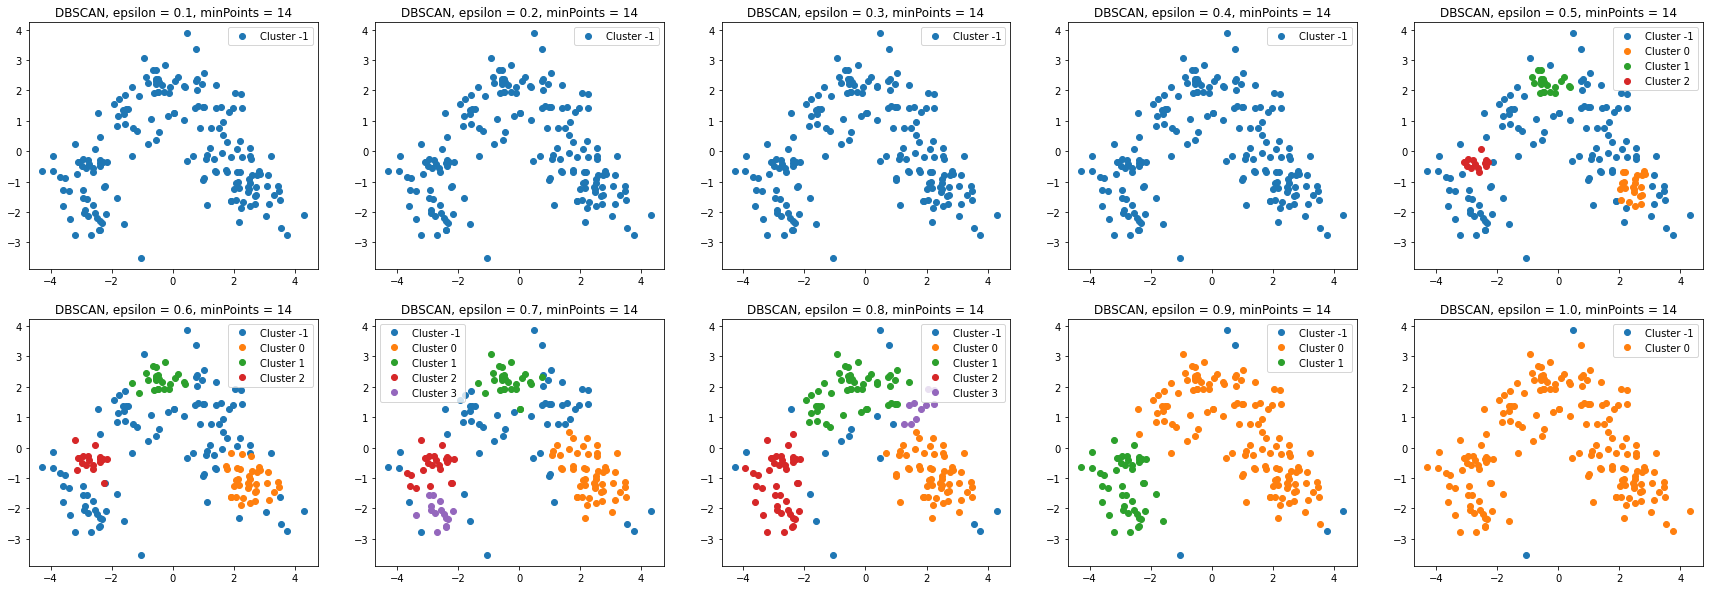

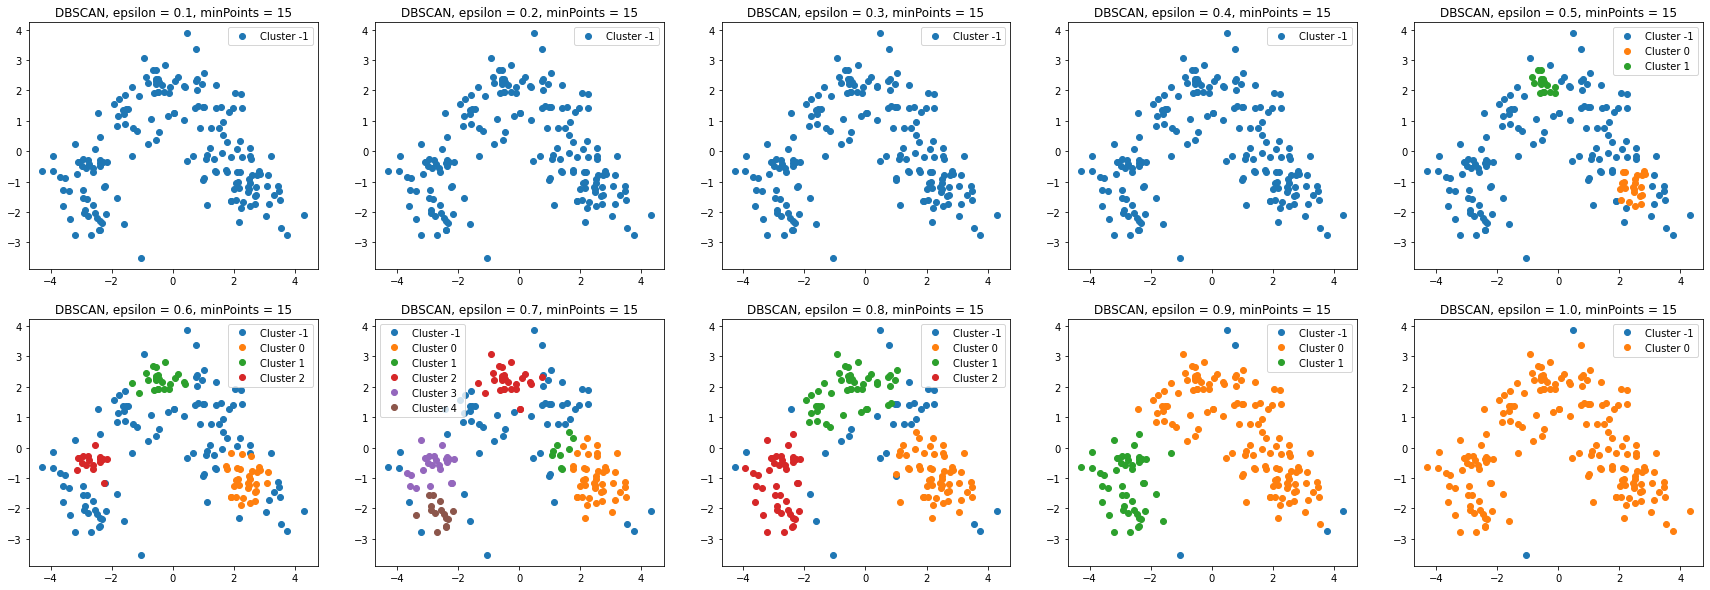

In [221]:
for ll in range(5, 16):
    eps = np.linspace(0.1, 1, 10)
    fig, ax = plt.subplots(2,5,figsize = (30,10))
    z= 0
    for kk in range(2):
        for jj in range(5):
            db = DBSCAN(eps = eps[z], min_samples = ll)
            dbLabes = db.fit_predict(winePCA)
            for ii in np.unique(dbLabes):
                ax[kk, jj].plot(winePCA[np.argwhere(dbLabes == ii), 0], winePCA[np.argwhere(dbLabes == ii), 1], 'o')

            ax[kk, jj].legend(['Cluster %d' % ii for ii in np.unique(dbLabes)])
            ax[kk, jj].set_title("DBSCAN, epsilon = %0.1f, minPoints = %d" % (eps[z], ll))


            z += 1

Text(0.5, 1.0, 'DBSCAN, epsilon = 0.8, minPoints = 15')

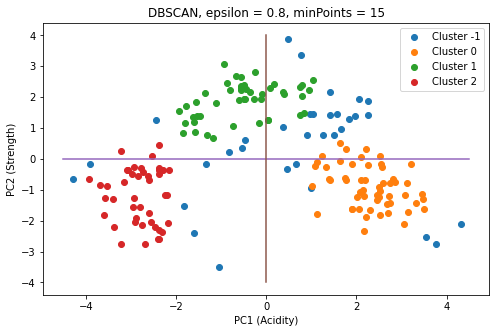

In [125]:
# 0.7,  9
# 0.8, 15
db = DBSCAN(eps = 0.8, min_samples = 15)
dbLabes = db.fit_predict(winePCA)
for ii in np.unique(dbLabes):
    plt.plot(winePCA[np.argwhere(dbLabes == ii), 0], winePCA[np.argwhere(dbLabes == ii), 1], 'o')
plt.plot([-4.5, 4.5], [0,0])
plt.plot([0,0], [4,-4])
plt.xlabel("PC1 (Acidity)")
plt.ylabel("PC2 (Strength)")
plt.legend(['Cluster %d' % ii for ii in np.unique(dbLabes)])
plt.title("DBSCAN, epsilon = %0.1f, minPoints = %d" % (0.8, 15))

# Extra Credit B

In [126]:
import plotly.graph_objects as go

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [184]:
pca = PCA(3).fit(wineStandardized)
winePCA = pca.fit_transform(wineStandardized)
loadings = pca.components_


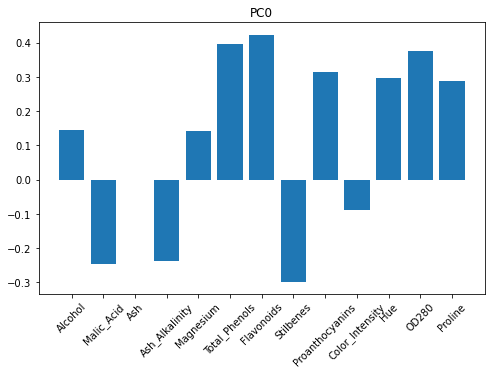

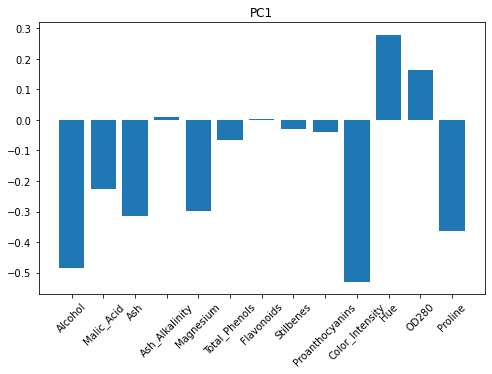

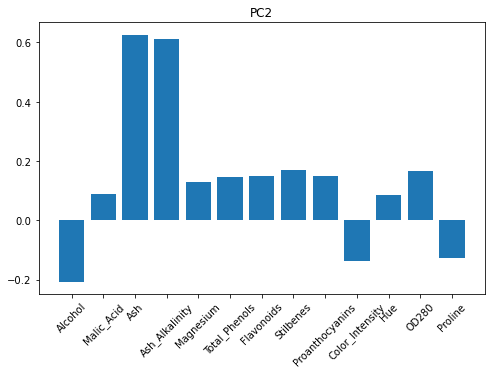

In [187]:
for ii in range(3):
    plt.figure()
    plt.bar(range(len(loadings[0])), loadings[ii])
    plt.xticks(range(len(loadings[0])), wine.columns, rotation = 45);
    plt.title('PC%d' % ii)


For n_clusters = 2 The average silhouette_score is : 0.3893881308900331
For n_clusters = 3 The average silhouette_score is : 0.45323512156839507
For n_clusters = 4 The average silhouette_score is : 0.41181235310244146
For n_clusters = 5 The average silhouette_score is : 0.38893303561611653
For n_clusters = 6 The average silhouette_score is : 0.3088746142641902
For n_clusters = 7 The average silhouette_score is : 0.2896945422326822
For n_clusters = 8 The average silhouette_score is : 0.3002487742795543


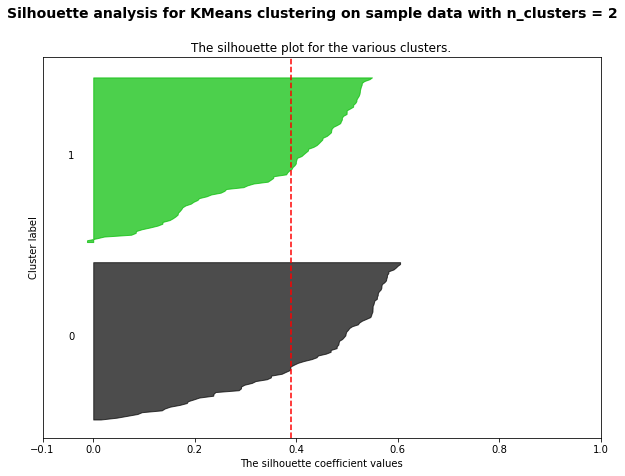

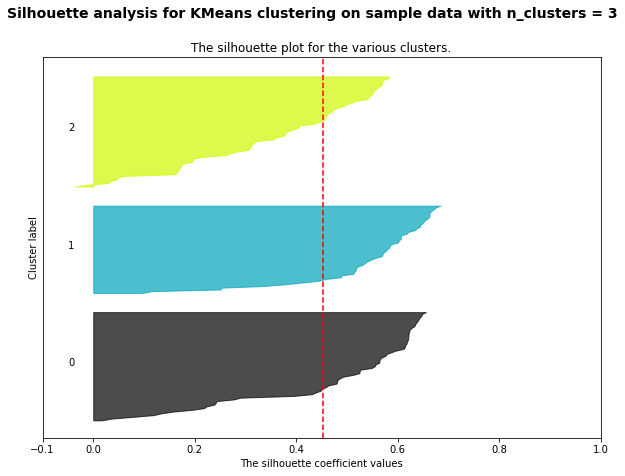

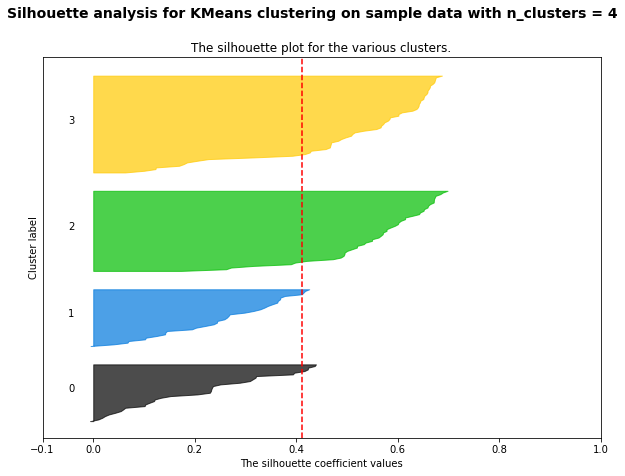

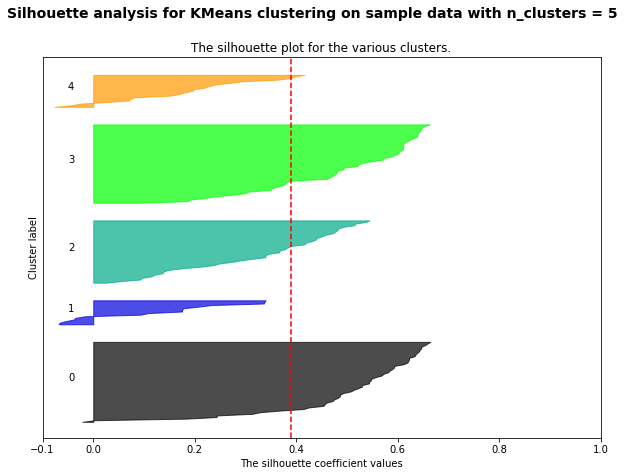

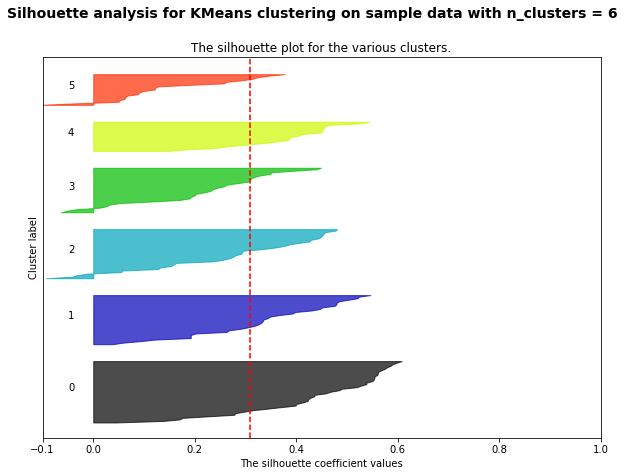

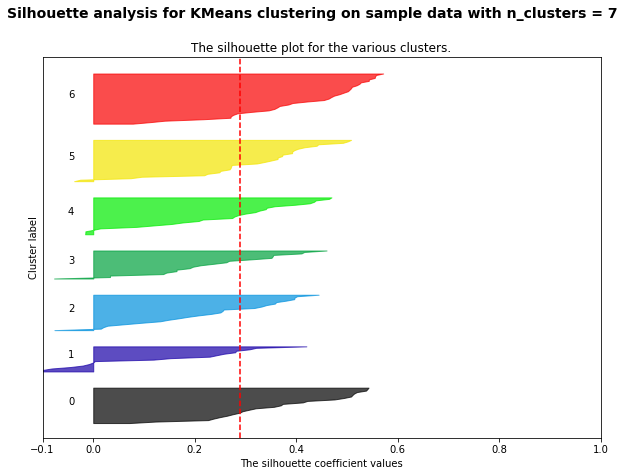

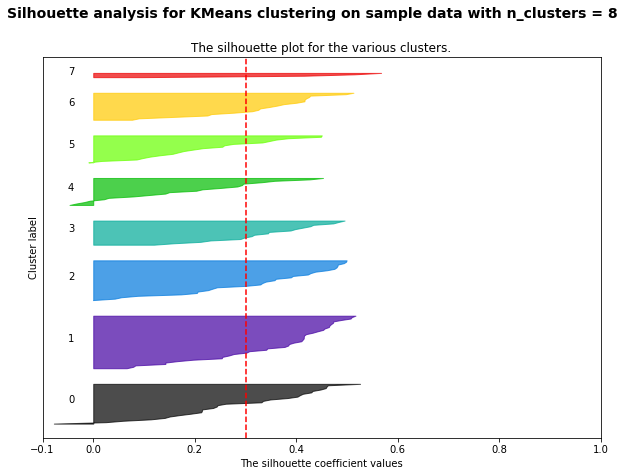

In [157]:
silhoutte(winePCA, [2,3,4,5,6,7,8])

In [161]:
k3d = KMeans(3).fit(winePCA)
k = k3d.predict(winePCA)

In [195]:
X = winePCA
#plt.plot(X[np.argwhere(k == 0), 0], X[np.argwhere(k == 0), 1], 'o', color = 'red')
plot = go.Figure(layout = go.Layout(width = 1000, height = 1000))
for ii in range(3):
    plot.add_trace(go.Scatter3d(x = X[np.argwhere(k == ii), 0].T[0], y = X[np.argwhere(k == ii), 1].T[0], z = X[np.argwhere(k == ii), 2].T[0], mode = 'markers',marker_size = 5))
#plot.add_trace(go.Scatter3d(x = X[np.argwhere(k == 1), 0], y = X[np.argwhere(k == 1), 1], z = X[np.argwhere(k == 1), 2], mode = 'markers',marker_size = 3))
#plot.add_trace(go.Scatter3d(x = X[np.argwhere(k == 2), 0], y = X[np.argwhere(k == 2), 1], z = X[np.argwhere(k == 2), 2], mode = 'markers',marker_size = 3))
plot.update_layout(scene = dict(
                    xaxis_title='Acidity',
                    yaxis_title='Strength',
                    zaxis_title='Ash Content'))
plot.show()

In [180]:
X[np.argwhere(k == 0), 0].T[0]

array([3.31675081, 2.20946492, 2.51674015, 3.75706561, 1.00890849,
       3.05025392, 2.44908967, 2.05943687, 2.5108743 , 2.75362819,
       3.47973668, 1.7547529 , 2.11346234, 3.45815682, 4.31278391,
       2.3051882 , 2.17195527, 1.89897118, 3.54198508, 2.0845222 ,
       3.12440254, 1.08657007, 2.53522408, 1.64498834, 1.76157587,
       0.9900791 , 1.77527763, 1.23542396, 2.18840633, 2.25610898,
       2.50022003, 2.67741105, 1.62857912, 1.90269086, 1.41038853,
       1.90382623, 1.38486223, 1.12220741, 1.5021945 , 2.52980109,
       2.58809543, 0.66848199, 3.07080699, 0.46220914, 2.10135193,
       1.13616618, 2.72660096, 2.82133927, 2.00985085, 2.7074913 ,
       3.21491747, 2.85895983, 3.50560436, 2.22479138, 2.14698782,
       2.46932948, 2.74151791, 2.17374092, 3.13938015, 2.56222717,
       2.54386518, 2.25190942, 1.33632173])